<a href="https://colab.research.google.com/github/cnpnina/supervised-learning/blob/main/Lab5_1640902837.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

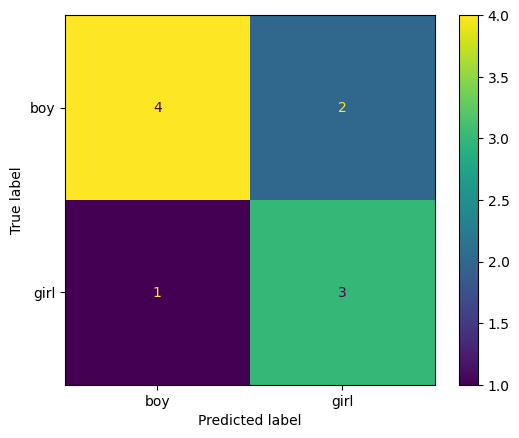

[[4 2]
 [1 3]]
['boy' 'girl']
[0 1 0 1 1 0 0 1 0 0]
[1 1 0 1 0 0 0 1 1 0]
              precision    recall  f1-score   support

           0       0.80      0.67      0.73         6
           1       0.60      0.75      0.67         4

    accuracy                           0.70        10
   macro avg       0.70      0.71      0.70        10
weighted avg       0.72      0.70      0.70        10



In [ ]:
y_actual = ['boy', 'girl', 'boy', 'girl', 'girl', 'boy', 'boy', 'girl', 'boy', 'boy']
y_predict = ['girl', 'girl', 'boy', 'girl', 'boy', 'boy', 'boy', 'girl', 'girl', 'boy']

from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
ConfusionMatrixDisplay.from_predictions(y_actual, y_predict, labels = [ "boy", "girl" ] )
plt.show()

from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix( y_actual, y_predict, labels = [ "boy", "girl" ] )
tn, fp, fn, tp = conf_mat.ravel()
print(conf_mat)

from sklearn import metrics
tn_1, fp_1, fn_1, tp_1 = metrics.confusion_matrix(y_actual, y_predict, labels = [ "boy", "girl" ]).ravel()
from sklearn import preprocessing
lebel_en = preprocessing.LabelEncoder()
lebel_en.fit(y_actual)
print(lebel_en.classes_)
Y_act_encode = lebel_en.transform(y_actual)
Y_pred_encode = lebel_en.transform(y_predict)
print(Y_act_encode)
print(Y_pred_encode)
accuracy_1 = metrics.accuracy_score(Y_act_encode, Y_pred_encode)
precision_1 = metrics.precision_score(Y_act_encode, Y_pred_encode)
recall_1 = metrics.recall_score(Y_act_encode, Y_pred_encode)
f1_score_1 = metrics.f1_score(Y_act_encode, Y_pred_encode)
print(metrics.classification_report(Y_act_encode, Y_pred_encode))
from sklearn.metrics import accuracy_score
accuracy_2 = accuracy_score(Y_act_encode, Y_pred_encode)
from sklearn.metrics import precision_score
precision_2 = precision_score(Y_act_encode, Y_pred_encode)
from sklearn.metrics import recall_score
recall_2 = recall_score(Y_act_encode, Y_pred_encode)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64
train data :  [0.8735955056179775, 0.875, 0.8693820224719101, 0.898876404494382, 0.8764044943820225, 0.875, 0.8721910112359551, 0.875, 0.8707865168539326, 0.8946629213483146]
test data :  [0.7877094972067039, 0.7988826815642458, 0.8435754189944135, 0.7597765363128491, 0.8379888268156425, 0.7486033519553073, 0.8435754189944135, 0.8324022346368715, 0.8100558659217877, 0.776536312849162]


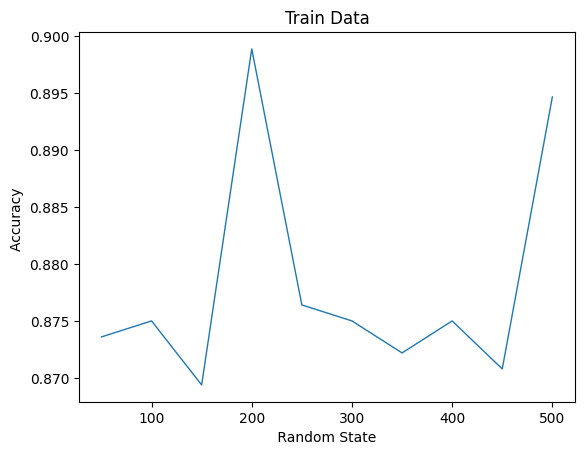

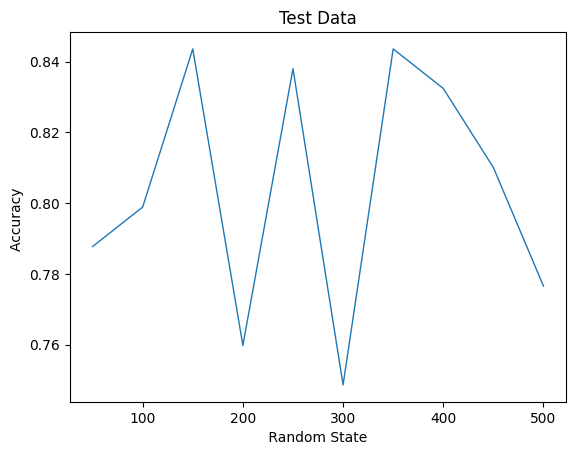

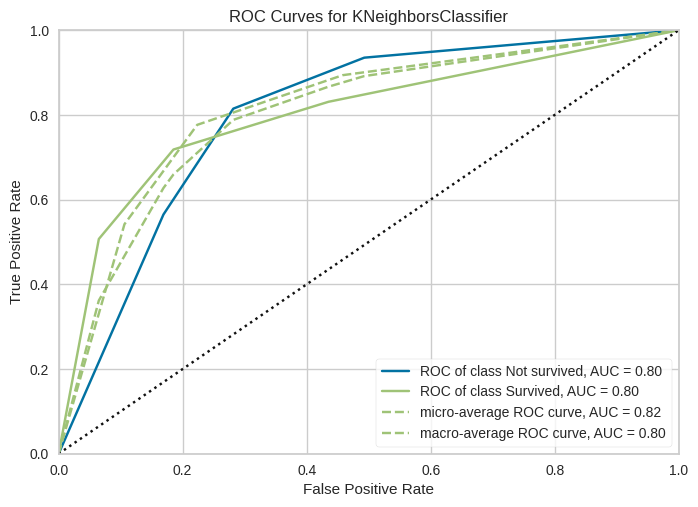

<Axes: title={'center': 'ROC Curves for KNeighborsClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [ ]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
data = pd.read_csv('Titanic-Dataset.csv')


def data_preparation(data):
#print missing value
  print(data.isna().sum())
#fill missing value
  data['Age'].fillna(data['Age'].mode()[0], inplace=True)
  data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)
  data['Embarked'] = LabelEncoder().fit_transform(data['Embarked'])
  data['Cabin'] = LabelEncoder().fit_transform(data['Cabin'])
  print(data.isna().sum())
  dummy = pd.get_dummies(data['Sex'])
  data = pd.concat([data, dummy], axis = 'columns')
  data.drop('Sex', axis=1, inplace=True)
  return data

data = data_preparation(data)
X = data.drop(["PassengerId", "Survived", "Name", "Ticket"], axis = 1)
y = data['Survived'].values


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)



range_state = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
acc_test = []
acc_train =[]
for n in range(10):

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = range_state[n])

  knn_model = KNeighborsClassifier(n_neighbors = 3)
  knn_model.fit(X_train, y_train)
  y_pred = knn_model.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  acc_test.append(accuracy)

  y_pred = knn_model.predict(X_train)
  accuracy = accuracy_score(y_train, y_pred)
  acc_train.append(accuracy)
print(f'train data : ', acc_train)
print(f'test data : ', acc_test)

plt.title('Train Data')
plt.xlabel(' Random State ')
plt.ylabel('Accuracy ')
plt.plot(range_state, acc_train, linewidth=1)
plt.show()

plt.title('Test Data')
plt.xlabel(' Random State ')
plt.ylabel('Accuracy ')
plt.plot(range_state, acc_test, linewidth=1)
plt.show()



from yellowbrick.classifier import ROCAUC
visualizer = ROCAUC(knn_model, classes=["Not survived", "Survived"])
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

train data :  [0.8782505910165485, 0.8739076154806492, 0.8731836195508587, 0.8721910112359551, 0.8727544910179641, 0.8667736757624398, 0.8670120898100173, 0.8726591760299626, 0.8734693877551021, 0.8786516853932584]
test data :  [0.7777777777777778, 0.8111111111111111, 0.8507462686567164, 0.8435754189944135, 0.8251121076233184, 0.835820895522388, 0.7980769230769231, 0.803921568627451, 0.7905236907730673, 0.7937219730941704]


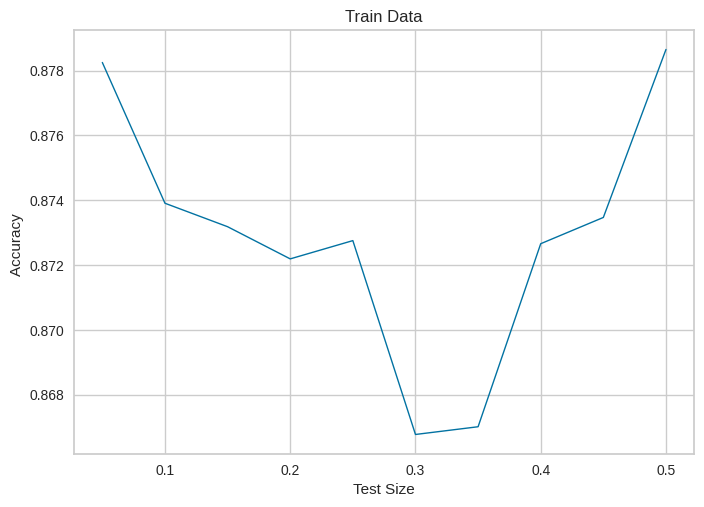

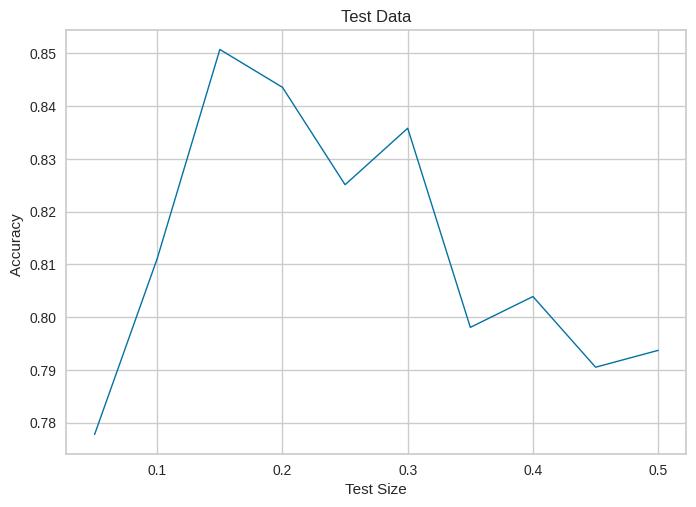

In [ ]:
random_size = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]
acc_size_train = []
acc_size_test =[]
for n in range(10):

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = random_size[n], random_state = 350)

  knn_model = KNeighborsClassifier(n_neighbors = 3)
  knn_model.fit(X_train, y_train)
  y_pred = knn_model.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  acc_size_test.append(accuracy)

  y_pred = knn_model.predict(X_train)
  accuracy = accuracy_score(y_train, y_pred)
  acc_size_train.append(accuracy)

print(f'train data : ', acc_size_train)
print(f'test data : ', acc_size_test)

plt.title('Train Data')
plt.xlabel(' Test Size ')
plt.ylabel('Accuracy ')
plt.plot(random_size, acc_size_train, linewidth=1)
plt.show()

plt.title('Test Data')
plt.xlabel(' Test Size ')
plt.ylabel('Accuracy ')
plt.plot(random_size, acc_size_test, linewidth=1)
plt.show()


best cv 5


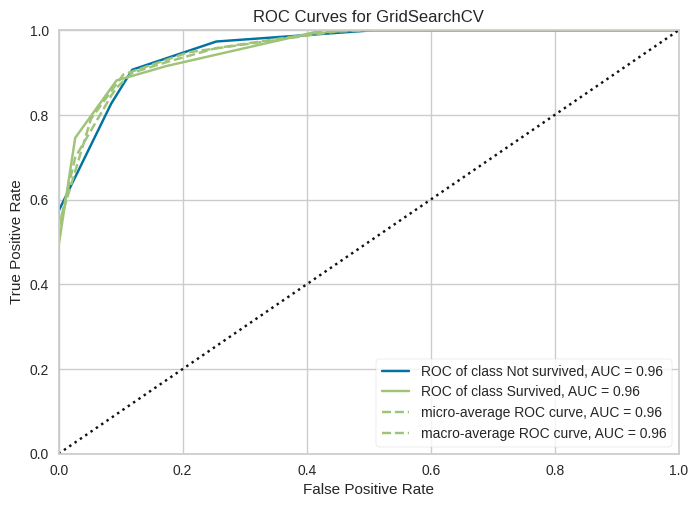

<Axes: title={'center': 'ROC Curves for GridSearchCV'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [ ]:
from sklearn.model_selection import GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 350)

knn_model = KNeighborsClassifier()
range_k = range(1,10)
knn_params = {'n_neighbors': range_k, 'weights' : ['uniform', 'distance'], 'algorithm' :  ['ball_tree', 'kd_tree', 'brute', 'auto']}
cv_score = []

for cv_1 in range(5,10):
  knn_model.fit(X_train, y_train)
  y_pred = knn_model.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  cv_score.append(accuracy)

  grid_model = GridSearchCV(knn_model, knn_params, cv = cv_1, scoring='accuracy')
  grid_model.fit(X, y)

#print(cv_score)

best_cv = cv_score.index(max(cv_score)) + 5
print(f'best cv' , best_cv)

grid_model = GridSearchCV(knn_model, knn_params, cv = 5, scoring='accuracy')
grid_model.fit(X, y)

from yellowbrick.classifier import ROCAUC
visualizer = ROCAUC(grid_model, classes=["Not survived", "Survived"])
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()